 ## ‏طلب مني إنشاء رؤى من هذه البيانات للمساعدة في التخطيط واتخاذ القرارات في المستقبل. سأحتاج إلى استخدام لغة الاستعلامات                                                                                                                               للإجابة على الأسئلة التي تظهر في الاجتماعات أو التقارير أو المناقشات الاستراتيجية.‏

## الأهداف:  ‏

### تقييم إنتاج كل ولاية على حدة لكل سلعة.
### تقييم إنتاج كل سلعة على مستوى الولايات.
### تقديم اقتراحات مدعومة بالبيانات للمجالات التي قد تحتاج إلى مزيد من الاهتمام. ‏

In [1]:
%%sql
select sum(new_values) as total_milk_prod2023
from milkProdu
where Year  = 2023;

,total_milk_prod2023
0,91812000000


In [5]:
%%sql
select StatesLookup.State, State_ANSI
from StatesLookup
where State_ANSI in
            (
                select cheeseProdu.State_ANSI as Highst_cheeProd_States
       
                        from cheeseProdu
                        
                        where new_values > 100000000 
                          and Year = 2023 
                          and Period = 'APR' );

,State,State_ANSI
0,CALIFORNIA,6
1,WISCONSIN,55


In [19]:
%%sql
select year, 
       SUM(new_values) as Total_CoffProd_byYear
from coffeeProdu
group by Year
having year > 2004;

,Year,Total_CoffProd_byYear
0,2005,8200000
1,2006,7400000
2,2007,7500000
3,2008,8700000
4,2009,8700000
5,2010,8800000
6,2011,7600000
7,2012,7000000
8,2013,8400000
9,2014,7500000


<Axes: xlabel='Year', ylabel='Total_CoffProd_byYear'>

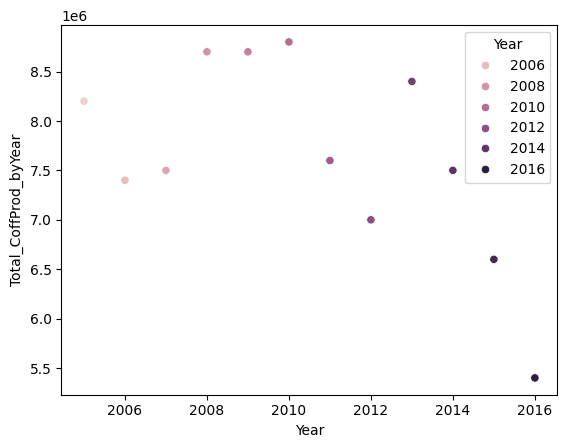

In [17]:
import  pandas as pd 
import seaborn as sns

df = df_sql2

#Line plot
sns.scatterplot(data=df, x='Year', y='Total_CoffProd_byYear', hue='Year')


In [21]:
%%sql
select honeyProdu.year,
       cast(avg(new_values) as integer) as Avg_hnyProd_byYear

from  honeyProdu
group by Year
having year > 2004;

,Year,Avg_hnyProd_byYear
0,2005,4157476
1,2006,3688333
2,2007,3531928
3,2008,3899738
4,2009,3571121
5,2010,4303951
6,2011,3618463
7,2012,3470634
8,2013,3738750
9,2014,4349024


<Axes: xlabel='Year', ylabel='Avg_hnyProd_byYear'>

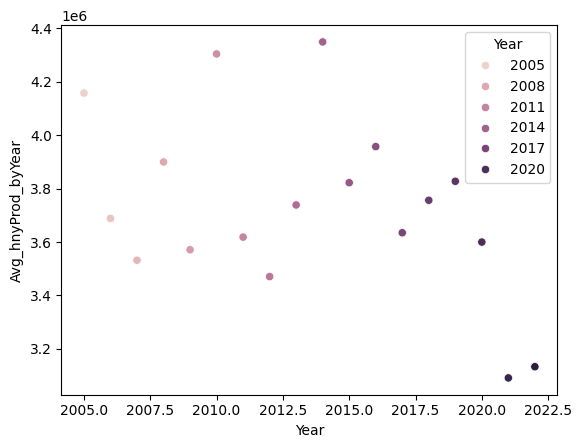

In [23]:
df = df_sql3
sns.scatterplot(data=df, x='Year', y='Avg_hnyProd_byYear', hue='Year')

In [27]:
%%sql
select StatesLookup.State, State_ANSI
from StatesLookup
where State = upper('florida');

,State,State_ANSI
0,FLORIDA,12


In [31]:
%%sql
SELECT StatesLookup.State, 
       COALESCE(cheeseProdu.new_values, 0) AS Cheese_Production
FROM StatesLookup
LEFT JOIN cheeseProdu ON StatesLookup.State_ANSI = cheeseProdu.State_ANSI
AND cheeseProdu.Year = 2023
AND cheeseProdu.Period = 'APR';


,State,Cheese_Production
0,ALABAMA,0
1,ALASKA,0
2,ARIZONA,0
3,ARKANSAS,0
4,CALIFORNIA,208807000
5,COLORADO,0
6,CONNECTICUT,0
7,DELAWARE,0
8,FLORIDA,0
9,GEORGIA,0


In [33]:
%%sql
select sum(YougertProdu.new_values) as Total_yogProd_2022_forstateProdChee2023
from YougertProdu
where Year = 2022
AND State_ANSI in (
                    select distinct State_ANSI
                    from cheeseProdu
                    where year = 2023
                  );

,Total_yogProd_2022_forstateProdChee2023
0,1171095000


In [35]:
%%sql
SELECT StatesLookup.State as States_NoMilk_Produ2023
from  StatesLookup
where State_ANSI not in (
                           select distinct State_ANSI
                           from milkProdu
                           where Year = 2023 );

,States_NoMilk_Produ2023
0,ALABAMA
1,ALASKA
2,ARKANSAS
3,CONNECTICUT
4,DELAWARE
5,HAWAII
6,KENTUCKY
7,LOUISIANA
8,MAINE
9,MARYLAND


In [47]:
%%sql
SELECT StatesLookup.State,
       COALESCE(cheeseProdu.new_values, 0) AS Cheese_Production
FROM StatesLookup
LEFT JOIN cheeseProdu ON StatesLookup.State_ANSI = cheeseProdu.State_ANSI
AND cheeseProdu.Year = 2023
AND cheeseProdu.Period = 'APR';

,State,Cheese_Production
0,ALABAMA,0
1,ALASKA,0
2,ARIZONA,0
3,ARKANSAS,0
4,CALIFORNIA,208807000
5,COLORADO,0
6,CONNECTICUT,0
7,DELAWARE,0
8,FLORIDA,0
9,GEORGIA,0


In [61]:
%%sql
SELECT cast(avg(coffeeProdu.new_values) as integer)  as Avg_coffProd_HnyExd100000000
 from coffeeProdu
 where Year in (
                select distinct year 
                from honeyProdu
                where new_values >1000000
                            );

,Avg_coffProd_HnyExd100000000
0,6426666
